<small><i>March 2018 - This notebook was created by [Santi Seguí](www.cvc.uab.es/people/ssegui/). Source and license info are in the folder.</i></small>

# Bokeh + HoloViews
Bokeh is a Python interactive visualization library that targets modern web browsers for presentation. Its goal is to provide elegant, concise construction of novel graphics in the style of D3.js, and to extend this capability with high-performance interactivity over very large or streaming datasets. Bokeh can help anyone who would like to quickly and easily create interactive plots, dashboards, and data applications.


HoloViews is an open-source Python library designed to make data analysis and visualization seamless and simple. With HoloViews, you can usually express what you want to do in very few lines of code, letting you focus on what you are trying to explore and convey, not on the process of plotting.

In [1]:
!conda install -c ioam holoviews bokeh -y

Solving environment: done

# All requested packages already installed.




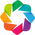

In [2]:
import pandas as pd
import numpy as np
import holoviews as hv
hv.extension('bokeh')

## Ploting with bokeh

In [3]:
from bokeh.plotting import figure, show

# create a new plot with default tools, using figure
p = figure(plot_width=400, plot_height=400)

# add a circle renderer with a size, color, and alpha
p.circle([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], size=15, line_color="navy", fill_color="orange", fill_alpha=0.5)

show(p) # show the results

In [4]:
# create a new plot using figure
p = figure(plot_width=400, plot_height=400)

# add a square renderer with a size, color, alpha, and sizes
p.square([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], size=[10, 15, 20, 25, 30], color="firebrick", alpha=0.6)

show(p) # show the results

In [5]:
# create a new plot (with a title) using figure
p = figure(plot_width=400, plot_height=400, title="My Line Plot")

# add a line renderer
p.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=2)

show(p) # show the results

In [6]:
# set up some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 8, 7, 3]

# create a new plot with figure
p = figure(plot_width=400, plot_height=400)

# add both a line and circles on the same plot
p.line(x, y, line_width=2)
p.circle(x, y, fill_color="white", size=8)

show(p) # show the results

In [7]:
from numpy import cos, linspace
x = linspace(-6, 6, 100)
y = cos(x)

In [8]:
p = figure(width=500, height=500)
p.circle(x, y, size=7, color="firebrick", alpha=0.5)
show(p)

In [9]:
from bokeh.sampledata.iris import flowers
flowers.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Plotting with HoloViews

In [10]:
macro_df = pd.read_csv('http://assets.holoviews.org/macro.csv', '\t')
macro_df.head()

,country,year,gdp,unem,capmob,trade
0,United States,1966,5.111141,3.8,0,9.622906
1,United States,1967,2.277283,3.8,0,9.983546
2,United States,1968,4.700000,3.6,0,10.089120
3,United States,1969,2.800000,3.5,0,10.435930
4,United States,1970,-0.200000,4.9,0,10.495350


In [11]:
key_dimensions   = [('year', 'Year'), ('country', 'Country')]
value_dimensions = [('unem', 'Unemployment'), ('capmob', 'Capital Mobility'),
                    ('gdp', 'GDP Growth'), ('trade', 'Trade')]
macro = hv.Table(macro_df, key_dimensions, value_dimensions)

In [12]:
%%opts Scatter [width=700 height=400 scaling_method='width' scaling_factor=2 size_index=2 show_grid=True] 
%%opts Scatter (color=Cycle('Category20') line_color='k')
%%opts NdOverlay [legend_position='left' show_frame=False]
gdp_unem_scatter = macro.to.scatter('Year', ['GDP Growth', 'Unemployment'])
gdp_unem_scatter

/Users/ssegui/anaconda/lib/python3.6/site-packages/bokeh/core/json_encoder.py:80: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(type(obj), np.float):


:HoloMap   [country]
   :Scatter   [year]   (gdp,unem)

In [13]:
gdp_unem_scatter.overlay('Country')

/Users/ssegui/anaconda/lib/python3.6/site-packages/bokeh/core/json_encoder.py:80: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(type(obj), np.float):


:NdOverlay   [country]
   :Scatter   [year]   (gdp,unem)

## Scatter

In [14]:
##Let's create a scatter chart with bokeh
p = figure(title="Iris Data Set", toolbar_location=None)
p.scatter(flowers.petal_length, flowers.petal_width)
show(p)

In [15]:
#Let's see how to create a holoview version
hv.help(hv.Chart)

Parameters of 'Chart'

Parameters changed from their default values are marked in red.
Soft bound values are marked in cyan.
C/V= Constant/Variable, RO/RW = ReadOnly/ReadWrite, AN=Allow None

Name                        Value                     Type     Bounds   Mode 

cdims                   OrderedDict()                 Dict              V RW 
datatype   ['array', 'dataframe', 'dictionary', ...   List   (0, None)  V RW 
extents            (None, None, None, None)          Tuple              V RW 
group                      'Chart'                   String             C RW 
kdims                  [Dimension('x')]               List     (1, 2)   V RW 
label                         ''                     String             C RW 
vdims                  [Dimension('y')]               List   (1, None)  V RW 

Parameter docstrings:

cdims:    The constant dimensions defined as a dictionary of Dimension:value
          pairs providing additional dimension information about the object.
     

In [16]:
scatter = hv.Scatter(flowers, 'sepal_length', 'sepal_width')
scatter

:Scatter   [sepal_length]   (sepal_width)

In [17]:
%%opts Scatter [color_index=3]
scatter = hv.Scatter(flowers, vdims=['sepal_length', 'sepal_width', 'species'])
scatter

:Scatter   [petal_length]   (sepal_length,sepal_width,species)

In [18]:
%%output size=200
%%opts Scatter [color_index=3,size_index=4]
scatter = hv.Scatter(flowers, vdims=['sepal_length', 'sepal_width', 'species','petal_length'])
scatter

:Scatter   [petal_width]   (sepal_length,sepal_width,species,petal_length)

In [19]:
%%output size=200
%%opts Scatter [color_index=3 size_index=4]
%%opts Scatter (cmap= 'Dark2_r', marker='o' size=4)
#EXERCISE: vary the marker shape by passing a column name as the `marker` keyword argument

scatter = hv.Scatter(flowers, vdims=['sepal_length', 'sepal_width', 'species','petal_length'])
scatter

:Scatter   [petal_width]   (sepal_length,sepal_width,species,petal_length)

## Bar Chart
For this section, we will use the "autompg" data set. Let's import it and take a quick look:

In [20]:
data = [('one',8),('two', 10), ('three', 16), ('four', 8), ('five', 4), ('six', 1)]
bars = hv.Bars(data, hv.Dimension('Car occupants'), 'Count')
bars

/Users/ssegui/anaconda/lib/python3.6/site-packages/bokeh/core/json_encoder.py:80: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(type(obj), np.float):


:Bars   [Car occupants]   (Count)

You can 'slice' a Bars element by selecting categories as follows:

In [21]:
bars[['one', 'two', 'three']] + bars[['four', 'five', 'six']]

/Users/ssegui/anaconda/lib/python3.6/site-packages/bokeh/core/json_encoder.py:80: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(type(obj), np.float):


:Layout
   .Bars.I  :Bars   [Car occupants]   (Count)
   .Bars.II :Bars   [Car occupants]   (Count)

Bars support stacking just like the Area element as well as grouping by a second key dimension. To activate grouping and stacking set the group_index or stack_index to the dimension name or dimension index:


In [22]:
%%opts Bars.Grouped [group_index='Group'] Bars.Stacked [stack_index='Group']
from itertools import product
np.random.seed(3)
index, groups = ['A', 'B'], ['a', 'b']
keys = product(index, groups)
bars = hv.Bars([k+(np.random.rand()*100.,) for k in keys],
               ['Index', 'Group'], 'Count')
bars.relabel(group='Grouped') + bars.relabel(group='Stacked')

:Layout
   .Grouped.I :Bars   [Index,Group]   (Count)
   .Stacked.I :Bars   [Index,Group]   (Count)

## Boxplot

In [23]:
title = 'petal_widht by species'
boxwhisker = hv.BoxWhisker(flowers, ['species'], 'petal_width', label=title)
boxwhisker

:BoxWhisker   [species]   (petal_width)

## Complex Graphs

In [24]:
import numpy as np
import scipy.special

from bokeh.layouts import gridplot
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

p1 = figure(title="Normal Distribution (μ=0, σ=0.5)",tools="save",
            background_fill_color="#E8DDCB")

mu, sigma = 0, 0.5

measured = np.random.normal(mu, sigma, 1000)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(-2, 2, 1000)
pdf = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2 / (2*sigma**2))
cdf = (1+scipy.special.erf((x-mu)/np.sqrt(2*sigma**2)))/2

p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p1.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
p1.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

p1.legend.location = "center_right"
p1.legend.background_fill_color = "darkgrey"
p1.xaxis.axis_label = 'x'
p1.yaxis.axis_label = 'Pr(x)'



p2 = figure(title="Log Normal Distribution (μ=0, σ=0.5)", tools="save",
            background_fill_color="#E8DDCB")

mu, sigma = 0, 0.5

measured = np.random.lognormal(mu, sigma, 1000)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(0.0001, 8.0, 1000)
pdf = 1/(x* sigma * np.sqrt(2*np.pi)) * np.exp(-(np.log(x)-mu)**2 / (2*sigma**2))
cdf = (1+scipy.special.erf((np.log(x)-mu)/(np.sqrt(2)*sigma)))/2

p2.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p2.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
p2.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

p2.legend.location = "center_right"
p2.legend.background_fill_color = "darkgrey"
p2.xaxis.axis_label = 'x'
p2.yaxis.axis_label = 'Pr(x)'



p3 = figure(title="Gamma Distribution (k=1, θ=2)", tools="save",
            background_fill_color="#E8DDCB")

k, theta = 1.0, 2.0

measured = np.random.gamma(k, theta, 1000)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(0.0001, 20.0, 1000)
pdf = x**(k-1) * np.exp(-x/theta) / (theta**k * scipy.special.gamma(k))
cdf = scipy.special.gammainc(k, x/theta) / scipy.special.gamma(k)

p3.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p3.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
p3.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

p3.legend.location = "center_right"
p3.legend.background_fill_color = "darkgrey"
p3.xaxis.axis_label = 'x'
p3.yaxis.axis_label = 'Pr(x)'



p4 = figure(title="Weibull Distribution (λ=1, k=1.25)", tools="save",
            background_fill_color="#E8DDCB")

lam, k = 1, 1.25

measured = lam*(-np.log(np.random.uniform(0, 1, 1000)))**(1/k)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(0.0001, 8, 1000)
pdf = (k/lam)*(x/lam)**(k-1) * np.exp(-(x/lam)**k)
cdf = 1 - np.exp(-(x/lam)**k)

p4.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
       fill_color="#036564", line_color="#033649")
p4.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
p4.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

p4.legend.location = "center_right"
p4.legend.background_fill_color = "darkgrey"
p4.xaxis.axis_label = 'x'
p4.yaxis.axis_label = 'Pr(x)'


show(gridplot(p1,p2,p3,p4, ncols=2, plot_width=400, plot_height=400, toolbar_location=None))

Loading BokehJS ...

## Interactions
In order to add widgets or have multiple plots that are linked together, you must first be able to create documents that contain these separate objects. It is possible to accomplish this in your own custom templates using bokeh.embed.components. But, Bokeh also provides simple layout capability for grid plots, vplots, and hplots (than can be nested).

An example using gridplot is shown below:

In [25]:
from bokeh.plotting import figure
from bokeh.layouts import gridplot

x = list(range(11))
y0, y1, y2 = x, [10-i for i in x], [abs(i-5) for i in x]

# create a new plot
s1 = figure(width=250, plot_height=250)
s1.circle(x, y0, size=10, color="navy", alpha=0.5)

# create another one
s2 = figure(width=250, height=250)
s2.triangle(x, y1, size=10, color="firebrick", alpha=0.5)

# create and another
s3 = figure(width=250, height=250)
s3.square(x, y2, size=10, color="olive", alpha=0.5)

# put all the plots in an HBox
p = gridplot([[s1, s2, s3]], toolbar_location=None)

# show the results
show(p)

## Linked Interactions
It is possible to link various interactions between different Bokeh plots. For instance, the ranges of two (or more) plots can be linked, so that when one of the plots is panned (or zoomed, or otherwise has its range changed) the other plots will update in unison. It is also possible to link selections between two plots, so that when items are selected on one plot, the corresponding items on the second plot also become selected.


### Linked panning
Linked panning (when mulitple plots have ranges that stay in sync) is simple to spell with Bokeh. You simply share the approrpate range objects between two (or more) plots. The example below shows how to accomplish this by linking the ranges of three plots in various ways:

In [26]:
plot_options = dict(width=250, plot_height=250, title=None, tools='pan')

# create a new plot
s1 = figure(**plot_options)
s1.circle(x, y0, size=10, color="navy")

# create a new plot and share both ranges
s2 = figure(x_range=s1.x_range, y_range=s1.y_range, **plot_options)
s2.triangle(x, y1, size=10, color="firebrick")

# create a new plot and share only one range
s3 = figure(x_range=s1.x_range, **plot_options)
s3.square(x, y2, size=10, color="olive")

p = gridplot([[s1, s2, s3]])

# show the results
show(p)

### Linked brushing
Linking selections is accomplished in a similar way, by sharing data sources between plots. Note that normally with bokeh.plotting and bokeh.charts creating a default data source for simple plots is handled automatically. However to share a data source, we must create them by hand and pass them explicitly. This is illustrated in the example below:

In [27]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource

x = list(range(-20, 21))
y0, y1 = [abs(xx) for xx in x], [xx**2 for xx in x]

# create a column data source for the plots to share
source = ColumnDataSource(data=dict(x=x, y0=y0, y1=y1))

TOOLS = "box_select,lasso_select"

# create a new plot and add a renderer
left = figure(tools=TOOLS, width=300, height=300)
left.circle('x', 'y0', source=source)

# create another new plot and add a renderer
right = figure(tools=TOOLS, width=300, height=300)
right.circle('x', 'y1', source=source)

p = gridplot([[left, right]])

show(p)

### Hover Tools
Bokeh has a Hover Tool that allows additional information to be displayed in a popup whenever the uer howevers over a specific glyph. Basic hover tool configuration amounts to providing a list of (name, format) tuples.

The example below shows some basic usage of the Hover tool with a circle glyph:

In [28]:
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import HoverTool


source = ColumnDataSource(data=dict(
    x=[1, 2, 3, 4, 5],
    y=[2, 5, 8, 2, 7],
    desc=['A', 'b', 'C', 'd', 'E'],
))

hover = HoverTool(tooltips=[
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("desc", "@desc"),
])

p = figure(plot_width=400, plot_height=400, tools=[hover],
           title="Mouse over the dots")

p.circle('x', 'y', size=20, source=source)

show(p)

## Customized Hovers

In [29]:
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import HoverTool


source = ColumnDataSource(data=dict(
    x=[1, 2, 3, 4, 5],
    y=[2, 5, 8, 2, 7],
    desc=['A', 'b', 'C', 'd', 'E'],
    imgs=[
        'https://bokeh.pydata.org/static/snake.jpg',
        'https://bokeh.pydata.org/static/snake2.png',
        'https://bokeh.pydata.org/static/snake3D.png',
        'https://bokeh.pydata.org/static/snake4_TheRevenge.png',
        'https://bokeh.pydata.org/static/snakebite.jpg'
    ],
    fonts=[
        '<i>italics</i>',
        '<pre>pre</pre>',
        '<b>bold</b>',
        '<small>small</small>',
        '<del>del</del>'
    ]
))

hover = HoverTool( tooltips="""
    <div>
        <div>
            <img
                src="@imgs" height="42" alt="@imgs" width="42"
                style="float: left; margin: 0px 15px 15px 0px;"
                border="2"
            ></img>
        </div>
        <div>
            <span style="font-size: 17px; font-weight: bold;">@desc</span>
            <span style="font-size: 15px; color: #966;">[$index]</span>
        </div>
        <div>
            <span>@fonts{safe}</span>
        </div>
        <div>
            <span style="font-size: 15px;">Location</span>
            <span style="font-size: 10px; color: #696;">($x, $y)</span>
        </div>
    </div>
    """
)

p = figure(plot_width=400, plot_height=400, tools=[hover],
           title="Mouse over the dots")

p.circle('x', 'y', size=20, source=source)

show(p)

For more info check: https://bokeh.pydata.org/en/latest/docs/user_guide/tools.html

In [30]:
import bokeh
bokeh.sampledata.download('geodata')

Using data directory: /Users/ssegui/.bokeh/data
Downloading: CGM.csv (1589982 bytes)
   1589982 [100.00%]
Downloading: US_Counties.zip (3182088 bytes)
   3182088 [100.00%]
Unpacking: US_Counties.csv
Downloading: us_cities.json (713565 bytes)
    713565 [100.00%]
Downloading: unemployment09.csv (253301 bytes)
    253301 [100.00%]
Downloading: AAPL.csv (166698 bytes)
    166698 [100.00%]
Downloading: FB.csv (9706 bytes)
      9706 [100.00%]
Downloading: GOOG.csv (113894 bytes)
    113894 [100.00%]
Downloading: IBM.csv (165625 bytes)
    165625 [100.00%]
Downloading: MSFT.csv (161614 bytes)
    161614 [100.00%]
Downloading: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip (5148539 bytes)
   5148539 [100.00%]
Unpacking: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.csv
Downloading: gapminder_fertility.csv (64346 bytes)
     64346 [100.00%]
Downloading: gapminder_population.csv (94509 bytes)
     94509 [100.00%]
Downloading: gapminder_life_expectancy.csv (73243 bytes)
     73243 [100.00%]
Downloading:

In [31]:
from bokeh.io import output_file, show
from bokeh.models import GeoJSONDataSource
from bokeh.plotting import figure
from bokeh.sampledata.sample_geojson import geojson

geo_source = GeoJSONDataSource(geojson=geojson)

p = figure()
p.circle(x='x', y='y', alpha=0.9, source=geo_source)
#output_file("geojson.html")
show(p)

In [32]:
from bokeh.plotting import figure, show, output_file
from bokeh.tile_providers import CARTODBPOSITRON


# range bounds supplied in web mercator coordinates
p = figure(x_range=(-1400000, 300000), y_range=(4300000, 5000000),
           x_axis_type="linear", y_axis_type="linear")
p.add_tile(CARTODBPOSITRON)
source = ColumnDataSource(
    data=dict(lat=[ 5100000.29],lon=[ 200000.70])
)

p.circle(x="lon", y="lat", size=15, fill_color="blue", fill_alpha=0.8, source=source)

show(p)

In [33]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap


map_options = GMapOptions(lat=30.2861, lng=-97.7394, map_type="roadmap", zoom=11)

# For GMaps to function, Google requires you obtain and enable an API key:
#
#     https://developers.google.com/maps/documentation/javascript/get-api-key
#
# Replace the value below with your personal API key:
p = gmap("GOOGLE_API_KEY", map_options, title="Austin")

source = ColumnDataSource(
    data=dict(lat=[ 30.29,  30.20,  30.29],
              lon=[-97.70, -97.74, -97.78])
)

p.circle(x="lon", y="lat", size=15, fill_color="blue", fill_alpha=0.8, source=source)

show(p)

In [34]:
%opts Nodes Graph [width=800 height=800 xaxis=None yaxis=None]

In [35]:
%%opts Graph [color_index='circle']
%%opts Graph (node_size=10 edge_line_width=1)
colors = ['#000000']+hv.Cycle('Category20').values
edges_df = pd.read_csv('https://raw.githubusercontent.com/ioam/holoviews/master/examples/assets/fb_edges.csv')
fb_nodes = hv.Nodes(pd.read_csv('https://raw.githubusercontent.com/ioam/holoviews/master/examples/assets/fb_nodes.csv')).sort()
fb_graph = hv.Graph((edges_df, fb_nodes), label='Facebook Circles')
fb_graph = fb_graph.redim.range(x=(-0.05, 1.05), y=(-0.05, 1.05)).opts(style=dict(cmap=colors))
fb_graph

:Graph   [start,end]

In [36]:
#More about networks with holoviews: http://holoviews.org/user_guide/Network_Graphs.html

## Output file

In [37]:
from bokeh.plotting import output_file

output_file('graph.html', title="graph.py example")
# create a new plot with default tools, using figure
p = figure(plot_width=400, plot_height=400)

# add a circle renderer with a size, color, and alpha
p.circle([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], size=15, line_color="navy", fill_color="orange", fill_alpha=0.5)

show(p) # show the results